#Python Library

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.metrics import pairwise
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Pre Processing

In [ ]:
df_selected = pd.read_csv('df_selected.csv')

In [ ]:
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
df_selected ['Brnd_Name'].nunique()

839

In [ ]:
# List of columns to convert to numeric
numeric_columns = ['Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes',
                    'GE65_Tot_Clms', 'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Tot_Benes']

# Convert columns to numeric
df_selected[numeric_columns] = df_selected[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the updated data types
print(df_selected.dtypes)

Prscrbr_NPI                int64
Prscrbr_Last_Org_Name     object
Prscrbr_First_Name        object
Prscrbr_City              object
Prscrbr_State_Abrvtn      object
Prscrbr_State_FIPS         int64
Prscrbr_Type              object
Prscrbr_Type_Src          object
Brnd_Name                 object
Gnrc_Name                 object
Tot_Clms                   int64
Tot_30day_Fills          float64
Tot_Day_Suply              int64
Tot_Drug_Cst             float64
Tot_Benes                  int64
GE65_Sprsn_Flag           object
GE65_Tot_Clms            float64
GE65_Tot_30day_Fills     float64
GE65_Tot_Drug_Cst        float64
GE65_Tot_Day_Suply       float64
GE65_Bene_Sprsn_Flag      object
GE65_Tot_Benes           float64
Region                    object
disease                   object
drug                      object
dtype: object


In [ ]:
missing_values = df_selected.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Prscrbr_NPI                 0
Prscrbr_Last_Org_Name       0
Prscrbr_First_Name          0
Prscrbr_City                0
Prscrbr_State_Abrvtn        0
Prscrbr_State_FIPS          0
Prscrbr_Type                0
Prscrbr_Type_Src            0
Brnd_Name                   0
Gnrc_Name                   0
Tot_Clms                    0
Tot_30day_Fills             0
Tot_Day_Suply               0
Tot_Drug_Cst                0
Tot_Benes                5719
GE65_Sprsn_Flag          5392
GE65_Tot_Clms            4608
GE65_Tot_30day_Fills     4608
GE65_Tot_Drug_Cst        4608
GE65_Tot_Day_Suply       4608
GE65_Bene_Sprsn_Flag     1034
GE65_Tot_Benes           8966
dtype: int64


In [ ]:
# Impute null values in 'Tot_Benes' column with 6
df_impute = df_selected.fillna({'Tot_Benes': 6})

In [ ]:
df_impute.shape

(10000, 22)

In [ ]:
df_impute = pd.read_csv('drug_disease.csv')

In [ ]:
# Define the states-to-region mapping dictionary
states = {
    'AK': 'West', 'AL': 'Southeast', 'AR': 'South',
    'AZ': 'Southwest', 'CA': 'West', 'CO': 'West',
    'CT': 'Northeast', 'DC': 'Southeast', 'DE': 'Northeast',
    'FL': 'Southeast', 'GA': 'Southeast', 'HI': 'West',
    'IA': 'Midwest', 'ID': 'West', 'IL': 'Midwest',
    'IN': 'Midwest', 'KS': 'Midwest', 'KY': 'Southeast',
    'LA': 'South', 'MA': 'Northeast', 'MD': 'Northeast',
    'ME': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest',
    'MO': 'Midwest', 'MS': 'Southeast', 'MT': 'West',
    'NC': 'Southeast', 'ND': 'Midwest', 'NE': 'Midwest',
    'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'Southwest',
    'NV': 'West', 'NY': 'Northeast', 'OH': 'Midwest',
    'OK': 'Southwest', 'OR': 'West', 'PA': 'Northeast',
    'RI': 'Northeast', 'SC': 'Southeast', 'SD': 'Midwest',
    'TN': 'Southeast', 'TX': 'Southwest', 'UT': 'West',
    'VA': 'Southeast', 'VT': 'Northeast', 'WA': 'West',
    'WI': 'Midwest', 'WV': 'Southeast', 'WY': 'West'
}

# Map states to regions
df_impute['Region'] = df_impute['Prscrbr_State_Abrvtn'].map(states)

In [ ]:
# Group the data by generic name and sum the total cost and total claims
grouped_data = df_impute.groupby('Gnrc_Name').agg({'Tot_Drug_Cst': 'sum', 'Tot_Clms': 'sum'})

# Find the top 10 drugs by total cost
top_10_drugs_cost = grouped_data.nlargest(10, 'Tot_Drug_Cst')

# Create a new column 'Top10Drug' and set it to 'Other' by default
df_impute['Top10Drug'] = 0

# Set the top 10 drug label for each row
df_impute.loc[df_impute['Gnrc_Name'].isin(top_10_drugs_cost.index), 'Top10Drug'] = 1

In [ ]:
cluster_model1_df = pd.get_dummies(df_impute[['Region','Top10Drug']],drop_first=False)
cluster_model1_df = pd.concat([df_impute[['Gnrc_Name','Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes','Tot_30day_Fills']],
                               cluster_model1_df], axis=1)
cluster_model1_df.set_index('Gnrc_Name', inplace=True)

In [ ]:
# Define the columns to apply log transformation
columns_to_transform = ['Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes', 'Tot_30day_Fills']

# Apply log transformation to the selected columns
for column in columns_to_transform:
    cluster_model1_df[column] = np.log(cluster_model1_df[column] + 1)  # Adding 1 to handle zero values

cluster_model1_df.head()

,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West
Gnrc_Name,,,,,,,,,,,,
potassium chloride,4.700,8.969,8.695,3.497,5.298,0,False,False,False,True,False,False
fluconazole,2.708,4.112,3.296,1.946,2.708,0,True,False,False,False,False,False
acyclovir,4.043,7.444,7.916,2.996,4.564,0,False,False,False,False,True,False
fluticasone/vilanterol,3.091,9.112,6.538,1.946,3.178,0,True,False,False,False,False,False
enalapril maleate,2.639,5.682,6.538,1.946,3.178,0,False,False,False,True,False,False


# New Section

In [ ]:
cluster_model1_df.shape

(9954, 12)

#Model 1 - method - Ward

##Model

In [ ]:
# Perform hierarchical clustering
# linkage method can be changed based on your preference (e.g., 'single', 'complete', 'average', etc.)
linkage_matrix = linkage(cluster_model1_df, method='ward')

In [ ]:
memb = fcluster(linkage_matrix, 4, criterion='maxclust')
memb = pd.Series(memb, index=cluster_model1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  fluconazole, enalapril maleate, clindamycin hcl, amoxicillin, amoxicillin, cephalexin, famotidine, diclofenac sodium, azithromycin, methylprednisolone, escitalopram oxalate, potassium chloride, duloxetine hcl, trazodone hcl, tramadol hcl, triamcinolone acetonide, atenolol, metformin hcl, benazepril hcl, clindamycin hcl, paroxetine hcl, lamotrigine, ibuprofen, sulfamethoxazole/trimethoprim, oxycodone hcl, potassium chloride, ondansetron, clonidine hcl, chlorhexidine gluconate, omeprazole, acarbose, carisoprodol, warfarin sodium, fluoxetine hcl, allopurinol, losartan/hydrochlorothiazide, diazepam, tizanidine hcl, lisinopril, lisinopril, losartan potassium, ciprofloxacin hcl, hydralazine hcl, mirtazapine, cephalexin, peg3350/sod sulf,bicarb,cl/kcl, risperidone, buspirone hcl, escitalopram oxalate, amoxicillin/potassium clav, oxycodone hcl, fluconazole, amoxicillin/potassium clav, lorazepam, doxycycline monohydrate, meloxicam, methylprednisolone, levocetirizine dihydrochloride, allopu

In [ ]:
cluster_model1_df['cluster'] = memb

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster
clust_mean1 = cluster_model1_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean1['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean1.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean1

Means of Input Variables for Clusters with Ward Linkage Method


,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,cluster,Cluster
1,2.882,5.128,5.940,2.242,3.105,0.000e+00,0.127,0.111,0.057,0.386,0.081,0.236,1.0,Cluster 1
2,3.447,6.463,7.235,2.383,3.973,6.849e-04,0.200,0.257,0.041,0.179,0.111,0.207,2.0,Cluster 2
3,3.051,9.547,6.631,2.024,3.335,1.479e-01,0.187,0.230,0.038,0.242,0.106,0.192,3.0,Cluster 3
4,4.943,8.543,8.905,3.700,5.558,5.437e-02,0.207,0.220,0.053,0.255,0.111,0.147,4.0,Cluster 4


## Plot

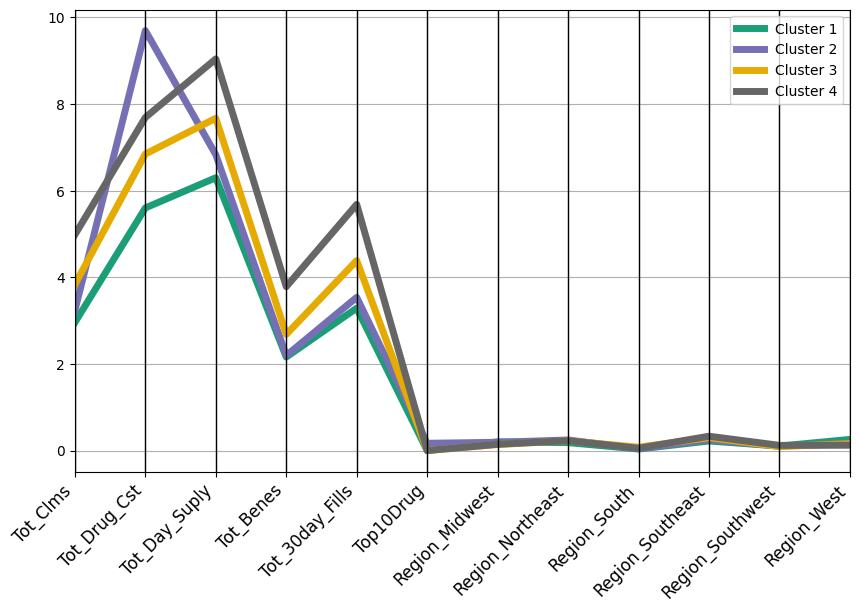

In [ ]:
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(10, 6))
#plt.subplots_adjust(right=3)

ax = parallel_coordinates(clust_mean1, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Metrics

#### Entropy calculation

In [ ]:
cluster_model1_df.reset_index(drop=False, inplace=True)
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Transpose the DataFrame to have clusters and counts as columns and drugs as rows
cluster_counts_transposed = cluster_counts.T

# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 7.43573964699788
Cluster 2: 7.640637202029043
Cluster 3: 7.107677843734003
Cluster 4: 6.887490199280856


#### Entropy for geographic distribution

In [ ]:
# List of region columns
region_columns = ['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West']

# Initialize an empty DataFrame to store the counts
region_counts_df = pd.DataFrame()

# Iterate over each region column
for region in region_columns:
    # Filter the DataFrame where the region is True
    region_df = cluster_model1_df[cluster_model1_df[region]]
    # Group by 'cluster' and count the occurrences of the region where value is True for each cluster
    cluster_counts = region_df.groupby('cluster').size()
    # Append the counts to the region_counts_df DataFrame with the region name as the column name
    region_counts_df[region] = cluster_counts

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = region_counts_df.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = region_counts_df.div(total_drugs_in_cluster, axis=0)

#Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities * np.log2(cluster_probabilities)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=1)

# Print the entropy for each cluster
print("Entropy for each Region:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f" {cluster}: {entropy}")


Entropy for each Region:
 1: 2.2816653778532223
 2: 2.427835219108574
 3: 2.4185677419288614
 4: 2.4434092865611854


###Entropy - disease

In [ ]:
df_impute['cluster_model1']=cluster_model1_df['cluster']

# Group by 'cluster' and count the occurrences of each disease in each cluster
cluster_counts = df_impute.groupby('cluster_model1')['disease'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_disease_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 6.028236024434746
Cluster 2: 6.147804057805185
Cluster 3: 5.799034806512769
Cluster 4: 5.819873259300008


### tech

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model1')['Gnrc_Name'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model1')['Gnrc_Name'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))


Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 317 unique drugs
0.9 % sodium chloride, acarbose, acetaminophen with codeine, acyclovir, albuterol sulfate, alendronate sodium, alfuzosin hcl, allopurinol, alprazolam, amantadine hcl, amiloride hcl, amiodarone hcl, amitriptyline hcl, amlodipine besylate, amlodipine besylate/benazepril, amoxicillin, amoxicillin/potassium clav, ampicillin trihydrate, aripiprazole, atenolol, atenolol/chlorthalidone, atorvastatin calcium, azelastine hcl, azithromycin, baclofen, benazepril hcl, benzonatate, benztropine mesylate, betamethasone dipropionate, betamethasone valerate, betamethasone/propylene glyc, bethanechol chloride, bisoprolol fumarate, bisoprolol/hydrochlorothiazide, brimonidine tartrate, bromocriptine mesylate, bumetanide, bupropion hcl, buspirone hcl, butalb/acetaminophen/caffeine, butalbital/aspirin/caffeine, carbamazepine, carbidopa/levodopa, carisoprodol, carvedilol, cefdinir, cefpodoxime proxetil, cefuroxim

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model1')['disease'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model1')['disease'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 148 unique drugs
abdominal distension, abnormal uterine bleeding, abortion, acne, acromegaly, actinomycosis, acute coronary syndrome, acute lymphocytic leukemia, acute otitis externa, addison's disease, adhd (attention deficit hyperactivity disorder), aggressive behavior, agitated state, agitation, aids related wasting, alcohol dependence, alcohol withdrawal, alkylating agent cystitis, allergic reactions, allergic rhinitis, allergic urticaria, alopecia, alport syndrome, alzheimer's disease, amenorrhea, amyloidosis, anal itching, androgenetic alopecia, anemia, megaloblastic, anesthesia, anesthetic adjunct, angina, angina pectoris prophylaxis, ankylosing spondylitis, anticholinesterase poisoning, antiphospholipid syndrome, anxiety, anxiety and stress, arrhythmia, ascites, aseptic necrosis, asthma, asthma, acute, asystole, atherosclerosis, atopic dermatitis, atrial fibrillation, atrophic urethritis, autism, ba

In [ ]:
# Calculate average drug cost for each cluster
average_drug_cost_per_cluster = df_impute.groupby('cluster_model1')['Tot_Drug_Cst'].mean()

# Calculate total drug cost for each cluster
total_drug_cost_per_cluster = df_impute.groupby('cluster_model1')['Tot_Drug_Cst'].sum()

# Print the results
print("Average Drug Cost for Each Cluster:")
print(average_drug_cost_per_cluster)

# Print the results
print("Total Drug Cost for Each Cluster:")
print(total_drug_cost_per_cluster)

Average Drug Cost for Each Cluster:
cluster_model1
1      229.307
2      871.725
3    33677.208
4    24618.250
Name: Tot_Drug_Cst, dtype: float64
Total Drug Cost for Each Cluster:
cluster_model1
1    6.395e+05
2    3.818e+06
3    4.486e+07
4    3.577e+07
Name: Tot_Drug_Cst, dtype: float64


In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:
acne, actinomycosis, acute coronary syndrome, adhd (attention deficit hyperactivity disorder), agitated state, agitation, alzheimer's disease, angina, ankylosing spondylitis, anxiety, anxiety and stress, arrhythmia, asthma, asthma, acute, atopic dermatitis, atrial fibrillation, atrophic urethritis, autism, benign prostatic hyperplasia, bipolar disorder, borderline personality disorder, breast cancer, cardiovascular risk reduction, chronic pain, conjunctivitis, conjunctivitis, allergic, constipation, constipation, acute, dercum's disease, diabetes mellitus, diabetes, type 2, ectopic pregnancy, edema, gerd, glaucoma, open angle, hashimoto's disease (chronic lymphocytic thyroiditis), high blood pressure (hypertension), hyperlipoproteinemia type iia, elevated ldl, insomnia, migraine, mitral valve prolapse, muscle pain, occipital neuralgia, osteoporosis, primary biliary cholangitis, psychosis, pulmonary fibrosis, reflex sympathetic dystrophy syndrome, restless

In [ ]:
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

#Model 2 - method - average , metric - Euclidean

##Model

In [ ]:
cluster_model1_df.set_index('Gnrc_Name', inplace=True)

In [ ]:
del cluster_model1_df['cluster']

In [ ]:
cluster_model1_df.columns

Index(['Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West'],
      dtype='object')

In [ ]:
# Perform hierarchical clustering
# linkage method can be changed based on your preference (e.g., 'single', 'complete', 'average', etc.)
linkage_matrix = linkage(cluster_model1_df, method='average', metric='euclidean')

In [ ]:
memb = fcluster(linkage_matrix, 4, criterion='maxclust')
memb = pd.Series(memb, index=cluster_model1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  asfotase alfa, golodirsen
2 :  potassium chloride, fluconazole, acyclovir, fluticasone/vilanterol, enalapril maleate, lisinopril, carbidopa/levodopa, clindamycin hcl, allopurinol, oxycodone hcl/acetaminophen, ropinirole hcl, amoxicillin, insulin glargine,hum.rec.anlog, amoxicillin, amlodipine besylate, cevimeline hcl, cephalexin, famotidine, quetiapine fumarate, insulin glargine,hum.rec.anlog, bupropion hcl, diclofenac sodium, dolutegravir/rilpivirine, potassium chloride, azithromycin, methylprednisolone, escitalopram oxalate, alprazolam, hydroxyzine hcl, latanoprost, furosemide, spironolactone, cariprazine hcl, pantoprazole sodium, potassium chloride, duloxetine hcl, fluticasone propion/salmeterol, trazodone hcl, warfarin sodium, trazodone hcl, tramadol hcl, triamcinolone acetonide, oxycodone hcl/acetaminophen, ammonium lactate, ropinirole hcl, rosuvastatin calcium, tamsulosin hcl, atenolol, metoprolol tartrate, albuterol sulfate, tizanidine hcl, metformin hcl, benazepril hcl, hy

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster
clust_mean2 = cluster_model1_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean2['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean2.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean2

Means of Input Variables for Clusters with Ward Linkage Method


,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,Cluster
1,2.636,14.313,5.897,1.946,2.636,0.500,0.000,1.000,0.000,0.000,0.000,0.000,Cluster 1
2,3.310,6.692,6.859,2.363,3.714,0.029,0.182,0.206,0.047,0.249,0.102,0.210,Cluster 2
3,5.395,8.187,9.415,4.169,6.065,0.000,0.139,0.226,0.043,0.366,0.099,0.116,Cluster 3
4,6.121,12.457,10.050,4.821,6.683,0.565,0.217,0.043,0.000,0.348,0.174,0.217,Cluster 4


In [ ]:
cluster_model1_df['cluster'] = memb

## Plot

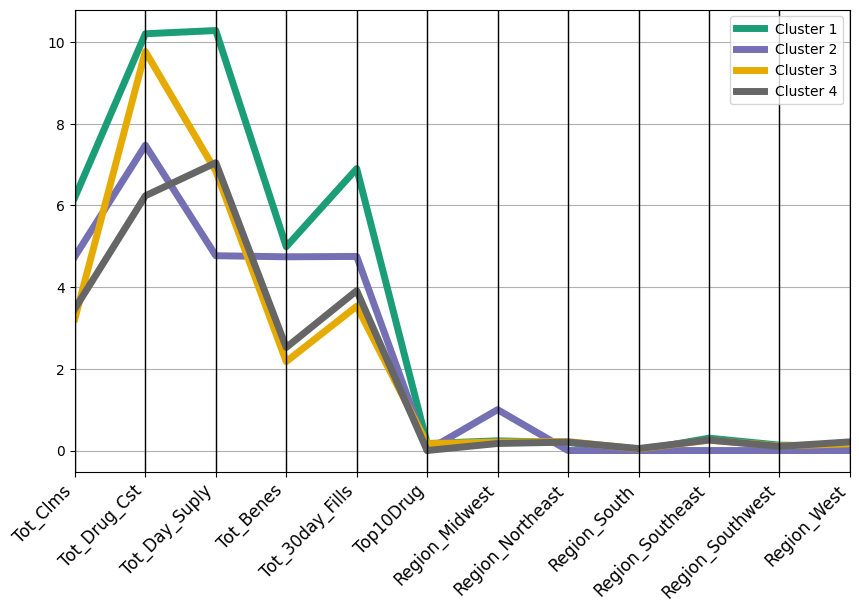

In [ ]:
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(10, 6))
#plt.subplots_adjust(right=3)

ax = parallel_coordinates(clust_mean2, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Metrics

#### Entropy calculation

In [ ]:
cluster_model1_df.reset_index(drop=False, inplace=True)
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Transpose the DataFrame to have clusters and counts as columns and drugs as rows
cluster_counts_transposed = cluster_counts.T

# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 1.0
Cluster 2: 8.153477404893547
Cluster 3: 5.922483711488072
Cluster 4: 3.6753108689123635


#### Entropy for geographic distribution

In [ ]:
# List of region columns
region_columns = ['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West']

# Initialize an empty DataFrame to store the counts
region_counts_df = pd.DataFrame()

# Iterate over each region column
for region in region_columns:
    # Filter the DataFrame where the region is True
    region_df = cluster_model1_df[cluster_model1_df[region]]
    # Group by 'cluster' and count the occurrences of the region where value is True for each cluster
    cluster_counts = region_df.groupby('cluster').size()
    # Append the counts to the region_counts_df DataFrame with the region name as the column name
    region_counts_df[region] = cluster_counts

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = region_counts_df.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = region_counts_df.div(total_drugs_in_cluster, axis=0)

#Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities * np.log2(cluster_probabilities)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=1)

# Print the entropy for each cluster
print("Entropy for each Region:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f" {cluster}: {entropy}")



Entropy for each Region:
 2: 2.4359290536611184
 3: 2.306262826953475
 4: 2.1227236539320726


Entropy for each Region:
 1: 2.2816653778532223
 2: 2.427835219108574
 3: 2.4185677419288614
 4: 2.4434092865611854


In [ ]:
df_impute['cluster_model2']=cluster_model1_df['cluster']

# Group by 'cluster' and count the occurrences of each disease in each cluster
cluster_counts = df_impute.groupby('cluster_model2')['disease'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_disease_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 0.0
Cluster 2: 6.487294428451798
Cluster 3: 5.0949744266312065
Cluster 4: 3.5342190211803404


### tech

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model2')['Gnrc_Name'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model2')['Gnrc_Name'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))


Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 2 unique drugs
asfotase alfa, golodirsen
Cluster 2: 635 unique drugs
0.9 % sodium chloride, abacavir/dolutegravir/lamivudi, abaloparatide, abatacept, abiraterone acetate, acalabrutinib, acarbose, acetaminophen with codeine, acetazolamide, acetylcysteine, acitretin, acyclovir, adalimumab, albuterol sulfate, alendronate sodium, alfuzosin hcl, alirocumab, allopurinol, alprazolam, amantadine hcl, amiloride hcl, amiodarone hcl, amitriptyline hcl, amlodipine besylate, amlodipine besylate/benazepril, amlodipine besylate/valsartan, ammonium lactate, amoxicillin, amoxicillin/potassium clav, ampicillin trihydrate, anastrozole, apixaban, aripiprazole, aripiprazole lauroxil, armodafinil, atenolol, atenolol/chlorthalidone, atomoxetine hcl, atorvastatin calcium, atropine sulfate, azathioprine, azelastine hcl, azelastine/fluticasone, azithromycin, bacitracin, baclofen, balsalazide disodium, beclomethasone dipropionate, be

In [ ]:
# Calculate average drug cost for each cluster
average_drug_cost_per_cluster = df_impute.groupby('cluster_model2')['Tot_Drug_Cst'].mean()

# Calculate total drug cost for each cluster
total_drug_cost_per_cluster = df_impute.groupby('cluster_model2')['Tot_Drug_Cst'].sum()

# Print the results
print("Average Drug Cost for Each Cluster:")
print(average_drug_cost_per_cluster)

# Print the results
print("Total Drug Cost for Each Cluster:")
print(total_drug_cost_per_cluster)

Average Drug Cost for Each Cluster:
cluster_model2
1    1.699e+06
2    7.066e+03
3    5.384e+03
4    5.490e+05
Name: Tot_Drug_Cst, dtype: float64
Total Drug Cost for Each Cluster:
cluster_model2
1    3.399e+06
2    6.553e+07
3    3.532e+06
4    1.263e+07
Name: Tot_Drug_Cst, dtype: float64


In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:

Count: 0


In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model2')['disease'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model2')['disease'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 2 unique drugs
duchenne muscular dystrophy, hypophosphatasia
Cluster 2: 247 unique drugs
abdominal distension, abnormal uterine bleeding, abortion, acetaminophen overdose, acne, acromegaly, actinic keratosis, actinomycosis, acute coronary syndrome, acute lymphoblastic leukemia, acute lymphocytic leukemia, acute myeloid leukemia, acute otitis externa, addison's disease, adhd (attention deficit hyperactivity disorder), adjunct to antibiotic therapy, aggressive behavior, agitated state, agitation, aids related wasting, aids/hiv, alcohol dependence, alcohol withdrawal, alkylating agent cystitis, allergic asthma, allergic reactions, allergic rhinitis, allergic urticaria, alopecia, alport syndrome, alzheimer's disease, amenorrhea, amyloidosis, anal itching, androgenetic alopecia, anemia, anemia, megaloblastic, anesthesia, anesthetic adjunct, angina, angina pectoris prophylaxis, angioblastoma, ankylosing spondylit

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:

Count: 0


#Model 3 - method - Single , metric - Euclidean

##Model

In [ ]:
cluster_model1_df.set_index('Gnrc_Name', inplace=True)

In [ ]:
del cluster_model1_df['cluster']

In [ ]:
cluster_model1_df.columns

Index(['Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West'],
      dtype='object')

In [ ]:
# Perform hierarchical clustering
# linkage method can be changed based on your preference (e.g., 'single', 'complete', 'average', etc.)
linkage_matrix = linkage(cluster_model1_df, method='single', metric='correlation')

In [ ]:
memb = fcluster(linkage_matrix, 4, criterion='maxclust')
memb = pd.Series(memb, index=cluster_model1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  diph,pertuss(acell),tet vac/pf, varicella-zoster ge/as01b/pf
2 :  potassium chloride, fluconazole, acyclovir, fluticasone/vilanterol, enalapril maleate, lisinopril, carbidopa/levodopa, clindamycin hcl, allopurinol, oxycodone hcl/acetaminophen, omeprazole, ropinirole hcl, amoxicillin, insulin glargine,hum.rec.anlog, amoxicillin, amlodipine besylate, cevimeline hcl, cephalexin, famotidine, latanoprost, quetiapine fumarate, insulin glargine,hum.rec.anlog, metformin hcl, bupropion hcl, diclofenac sodium, dolutegravir/rilpivirine, potassium chloride, azithromycin, methylprednisolone, escitalopram oxalate, alprazolam, hydroxyzine hcl, latanoprost, furosemide, spironolactone, cariprazine hcl, pantoprazole sodium, potassium chloride, duloxetine hcl, lisinopril, fluticasone propion/salmeterol, trazodone hcl, warfarin sodium, trazodone hcl, fludrocortisone acetate, tramadol hcl, triamcinolone acetonide, oxycodone hcl/acetaminophen, ammonium lactate, ropinirole hcl, rosuvastatin calcium, tam

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster
clust_mean3 = cluster_model1_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean3['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean3.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean3

Means of Input Variables for Clusters with Ward Linkage Method


,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,Cluster
1,2.659,7.171,2.659,2.629,2.659,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Cluster 1
2,3.454,6.806,7.037,2.488,3.876,0.028,0.179,0.207,0.047,0.257,0.102,0.204,Cluster 2
3,2.485,2.435,4.443,2.485,2.485,0.000,0.000,0.000,0.000,0.000,0.000,1.000,Cluster 3
4,2.944,8.133,2.944,2.833,2.944,0.000,0.000,0.000,0.000,0.000,1.000,0.000,Cluster 4


## Plot

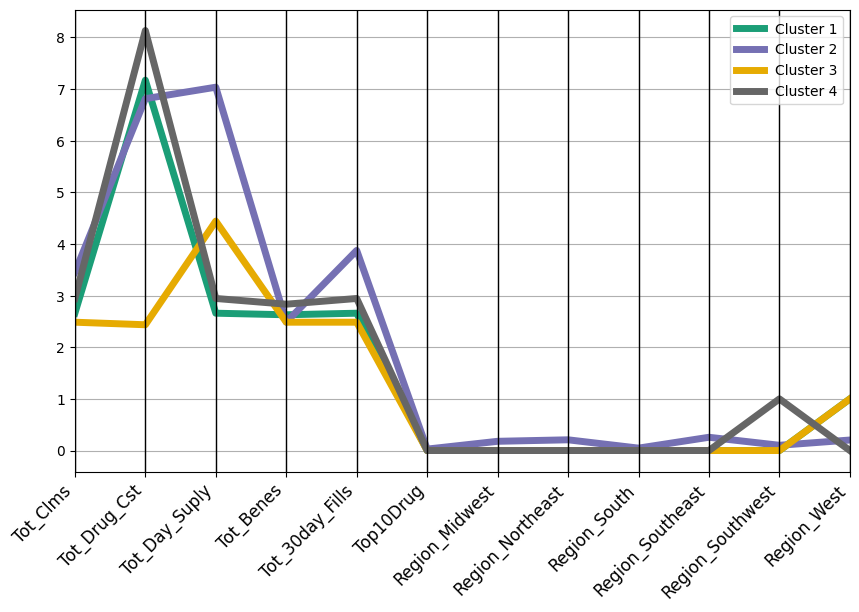

In [ ]:
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(10, 6))
#plt.subplots_adjust(right=3)

ax = parallel_coordinates(clust_mean3, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Metrics

In [ ]:
cluster_model1_df['cluster'] = memb

#### Entropy calculation

In [ ]:
cluster_model1_df.reset_index(drop=False, inplace=True)
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Transpose the DataFrame to have clusters and counts as columns and drugs as rows
cluster_counts_transposed = cluster_counts.T

# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 1.0
Cluster 2: 8.099563496898533
Cluster 3: 0.0
Cluster 4: 0.0


#### Entropy for geographic distribution

In [ ]:
# List of region columns
region_columns = ['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West']

# Initialize an empty DataFrame to store the counts
region_counts_df = pd.DataFrame()

# Iterate over each region column
for region in region_columns:
    # Filter the DataFrame where the region is True
    region_df = cluster_model1_df[cluster_model1_df[region]]
    # Group by 'cluster' and count the occurrences of the region where value is True for each cluster
    cluster_counts = region_df.groupby('cluster').size()
    # Append the counts to the region_counts_df DataFrame with the region name as the column name
    region_counts_df[region] = cluster_counts

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = region_counts_df.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = region_counts_df.div(total_drugs_in_cluster, axis=0)
#Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities * np.log2(cluster_probabilities)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=1)

# Print the entropy for each cluster
print("Entropy for each Region:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f" {cluster}: {entropy}")


Entropy for each Region:
 2: 2.4322581714958784


In [ ]:
df_impute['cluster_model3']=cluster_model1_df['cluster']

# Group by 'cluster' and count the occurrences of each disease in each cluster
cluster_counts = df_impute.groupby('cluster_model3')['disease'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_disease_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 0.0
Cluster 2: 6.4547539110338175
Cluster 3: 0.0
Cluster 4: 0.0


### Tech

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model3')['Gnrc_Name'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model3')['Gnrc_Name'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))


Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 2 unique drugs
diph,pertuss(acell),tet vac/pf, varicella-zoster ge/as01b/pf
Cluster 2: 639 unique drugs
0.9 % sodium chloride, abacavir/dolutegravir/lamivudi, abaloparatide, abatacept, abiraterone acetate, acalabrutinib, acarbose, acetaminophen with codeine, acetazolamide, acetylcysteine, acitretin, acyclovir, adalimumab, albuterol sulfate, alendronate sodium, alfuzosin hcl, alirocumab, allopurinol, alprazolam, amantadine hcl, amiloride hcl, amiodarone hcl, amitriptyline hcl, amlodipine besylate, amlodipine besylate/benazepril, amlodipine besylate/valsartan, ammonium lactate, amoxicillin, amoxicillin/potassium clav, ampicillin trihydrate, anastrozole, apixaban, aripiprazole, aripiprazole lauroxil, armodafinil, asfotase alfa, atenolol, atenolol/chlorthalidone, atomoxetine hcl, atorvastatin calcium, atropine sulfate, azathioprine, azelastine hcl, azelastine/fluticasone, azithromycin, bacitracin, baclofen, bal

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:

Count: 0


In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model3')['disease'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model3')['disease'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 2 unique drugs
acute myeloid leukemia, allergic reactions
Cluster 2: 250 unique drugs
abdominal distension, abnormal uterine bleeding, abortion, acetaminophen overdose, acne, acromegaly, actinic keratosis, actinomycosis, acute coronary syndrome, acute lymphoblastic leukemia, acute lymphocytic leukemia, acute myeloid leukemia, acute otitis externa, addison's disease, adhd (attention deficit hyperactivity disorder), adjunct to antibiotic therapy, aggressive behavior, agitated state, agitation, aids related wasting, aids/hiv, alcohol dependence, alcohol withdrawal, alkylating agent cystitis, allergic asthma, allergic reactions, allergic rhinitis, allergic urticaria, alopecia, alport syndrome, alzheimer's disease, amenorrhea, amyloidosis, anal itching, androgenetic alopecia, anemia, anemia, megaloblastic, anesthesia, anesthetic adjunct, angina, angina pectoris prophylaxis, angioblastoma, ankylosing spondylitis,

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:

Count: 0


In [ ]:
# Calculate average drug cost for each cluster
average_drug_cost_per_cluster = df_impute.groupby('cluster_model3')['Tot_Drug_Cst'].mean()

# Calculate total drug cost for each cluster
total_drug_cost_per_cluster = df_impute.groupby('cluster_model3')['Tot_Drug_Cst'].sum()

# Print the results
print("Average Drug Cost for Each Cluster:")
print(average_drug_cost_per_cluster)

# Print the results
print("Total Drug Cost for Each Cluster:")
print(total_drug_cost_per_cluster)

Average Drug Cost for Each Cluster:
cluster_model3
1    1811.870
2    8550.655
3      10.420
4    3403.820
Name: Tot_Drug_Cst, dtype: float64
Total Drug Cost for Each Cluster:
cluster_model3
1    3.624e+03
2    8.508e+07
3    1.042e+01
4    3.404e+03
Name: Tot_Drug_Cst, dtype: float64


#Model 4 - method - Complete , metric - Euclidean

##Model

In [ ]:
cluster_model1_df.set_index('Gnrc_Name', inplace=True)

In [ ]:
del cluster_model1_df['cluster']

In [ ]:
# Perform hierarchical clustering
# linkage method can be changed based on your preference (e.g., 'single', 'complete', 'average', etc.)
linkage_matrix = linkage(cluster_model1_df, method='complete', metric='euclidean')

In [ ]:
memb = fcluster(linkage_matrix, 4, criterion='maxclust')
memb = pd.Series(memb, index=cluster_model1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  fluconazole, clindamycin hcl, oxycodone hcl/acetaminophen, ropinirole hcl, amoxicillin, amoxicillin, cephalexin, famotidine, diclofenac sodium, azithromycin, methylprednisolone, potassium chloride, duloxetine hcl, trazodone hcl, warfarin sodium, tramadol hcl, atenolol, metformin hcl, benazepril hcl, clindamycin hcl, lamotrigine, pen needle, diabetic, ibuprofen, ondansetron hcl, calcitriol, metformin hcl, sulfamethoxazole/trimethoprim, oxycodone hcl, simvastatin, potassium chloride, ondansetron, clonidine hcl, chlorhexidine gluconate, omeprazole, acarbose, carisoprodol, allopurinol, losartan/hydrochlorothiazide, diazepam, tizanidine hcl, lisinopril, lorazepam, lisinopril, losartan potassium, meclizine hcl, ciprofloxacin hcl, mirtazapine, cephalexin, peg3350/sod sulf,bicarb,cl/kcl, risperidone, buspirone hcl, escitalopram oxalate, oxycodone hcl, lorazepam, fluconazole, trazodone hcl, amoxicillin/potassium clav, metformin hcl, lisinopril, lorazepam, doxycycline monohydrate, meloxicam

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster
clust_mean4 = cluster_model1_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean4['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean4.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean4

Means of Input Variables for Clusters with Ward Linkage Method


,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,Cluster
1,2.833,5.130,5.944,2.183,3.065,0.000,0.167,0.214,0.043,0.256,0.114,0.205,Cluster 1
2,3.541,6.858,7.307,2.469,4.044,0.009,0.174,0.207,0.051,0.260,0.090,0.213,Cluster 2
3,3.463,10.175,7.187,2.279,3.859,0.198,0.218,0.215,0.028,0.234,0.113,0.186,Cluster 3
4,5.403,8.313,9.449,4.180,6.094,0.022,0.205,0.167,0.059,0.270,0.116,0.171,Cluster 4


## Plot

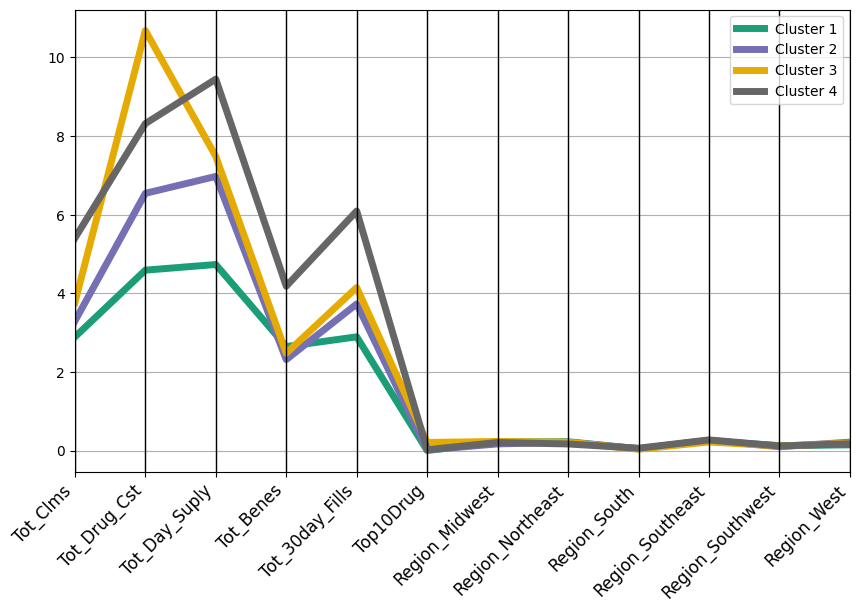

In [ ]:
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(10, 6))
#plt.subplots_adjust(right=3)

ax = parallel_coordinates(clust_mean4, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Metrics

In [ ]:
cluster_model1_df['cluster'] = memb

#### Entropy calculation

In [ ]:
cluster_model1_df.reset_index(drop=False, inplace=True)
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Transpose the DataFrame to have clusters and counts as columns and drugs as rows
cluster_counts_transposed = cluster_counts.T

# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 7.547988014782197
Cluster 2: 7.850070388885678
Cluster 3: 6.776761395128352
Cluster 4: 6.030495621648601


#### Entropy for geographic distribution

In [ ]:
# List of region columns
region_columns = ['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West']

# Initialize an empty DataFrame to store the counts
region_counts_df = pd.DataFrame()

# Iterate over each region column
for region in region_columns:
    # Filter the DataFrame where the region is True
    region_df = cluster_model1_df[cluster_model1_df[region]]
    # Group by 'cluster' and count the occurrences of the region where value is True for each cluster
    cluster_counts = region_df.groupby('cluster').size()
    # Append the counts to the region_counts_df DataFrame with the region name as the column name
    region_counts_df[region] = cluster_counts

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = region_counts_df.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = region_counts_df.div(total_drugs_in_cluster, axis=0)
#Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities * np.log2(cluster_probabilities)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=1)

# Print the entropy for each cluster
print("Entropy for each Region:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f" {cluster}: {entropy}")


Entropy for each Region:
 1: 2.4313716586424925
 2: 2.4263152062664015
 3: 2.402760239714862
 4: 2.4600796503018483


In [ ]:
df_impute['cluster_model4']=cluster_model1_df['cluster']

# Group by 'cluster' and count the occurrences of each disease in each cluster
cluster_counts = df_impute.groupby('cluster_model4')['disease'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_disease_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 6.102247544538992
Cluster 2: 6.2833003377897985
Cluster 3: 5.647629792725337
Cluster 4: 5.224606351600932


### Tech

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model4')['Gnrc_Name'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model4')['Gnrc_Name'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 347 unique drugs
0.9 % sodium chloride, acarbose, acetaminophen with codeine, acetazolamide, acetylcysteine, acyclovir, albuterol sulfate, alendronate sodium, alfuzosin hcl, allopurinol, alprazolam, amantadine hcl, amiloride hcl, amiodarone hcl, amitriptyline hcl, amlodipine besylate, amlodipine besylate/benazepril, amlodipine besylate/valsartan, ammonium lactate, amoxicillin, amoxicillin/potassium clav, ampicillin trihydrate, anastrozole, aripiprazole, atenolol, atomoxetine hcl, atorvastatin calcium, azathioprine, azelastine hcl, azithromycin, baclofen, benazepril hcl, benzonatate, benztropine mesylate, betamethasone valerate, betamethasone/propylene glyc, bethanechol chloride, bicalutamide, bisoprolol fumarate, brimonidine tartrate, bromocriptine mesylate, bumetanide, bupropion hcl, buspirone hcl, butalb/acetaminophen/caffeine, butalbital/aspirin/caffeine, calcitriol, calcium acetate, candesartan cilexeti

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:
albuterol sulfate, amantadine hcl, aripiprazole, brimonidine tartrate, carbidopa/levodopa, diclofenac sodium, diltiazem hcl, divalproex sodium, doxycycline hyclate, duloxetine hcl, estradiol, ezetimibe, fluticasone propionate, insulin lispro, lamotrigine, latanoprost, levetiracetam, memantine hcl, metformin hcl, oxycodone hcl, pen needle, diabetic, potassium chloride, pregabalin, quetiapine fumarate, rivaroxaban, rosuvastatin calcium, sucralfate, topiramate
Count: 28


In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model4')['disease'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model4')['disease'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 163 unique drugs
abdominal distension, abnormal uterine bleeding, abortion, acetaminophen overdose, acne, acromegaly, actinomycosis, acute coronary syndrome, acute lymphocytic leukemia, acute otitis externa, addison's disease, adhd (attention deficit hyperactivity disorder), aggressive behavior, agitated state, agitation, aids related wasting, alcohol dependence, alcohol withdrawal, alkylating agent cystitis, allergic reactions, allergic rhinitis, allergic urticaria, alopecia, alport syndrome, alzheimer's disease, amenorrhea, amyloidosis, anal itching, androgenetic alopecia, anemia, megaloblastic, anesthesia, anesthetic adjunct, angina, angina pectoris prophylaxis, ankylosing spondylitis, anticholinesterase poisoning, antiphospholipid syndrome, anxiety, anxiety and stress, arrhythmia, ascites, aseptic necrosis, asthma, asthma, acute, asystole, atherosclerosis, atopic dermatitis, atrial fibrillation, atrophi

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:
acne, actinomycosis, acute coronary syndrome, adhd (attention deficit hyperactivity disorder), aggressive behavior, agitated state, agitation, alport syndrome, alzheimer's disease, angina, anxiety, anxiety and stress, arrhythmia, asthma, asthma, acute, atherosclerosis, atopic dermatitis, atrial fibrillation, atrophic urethritis, bipolar disorder, cardiovascular risk reduction, chronic pain, conjunctivitis, conjunctivitis, bacterial, crohn's disease, dercum's disease, diabetes mellitus, diabetes, type 1, diabetes, type 2, ectopic pregnancy, edema, generalized anxiety disorder, gerd, glaucoma, open angle, high blood pressure (hypertension), high cholesterol, hypokalemia, muscle pain, restless legs syndrome, rheumatoid arthritis, rosacea, seizures (convulsions), sexual dysfunction, ssri induced, urinary incontinence
Count: 44


In [ ]:
# Calculate average drug cost for each cluster
average_drug_cost_per_cluster = df_impute.groupby('cluster_model4')['Tot_Drug_Cst'].mean()

# Calculate total drug cost for each cluster
total_drug_cost_per_cluster = df_impute.groupby('cluster_model4')['Tot_Drug_Cst'].sum()

# Print the results
print("Average Drug Cost for Each Cluster:")
print(average_drug_cost_per_cluster)

# Print the results
print("Total Drug Cost for Each Cluster:")
print(total_drug_cost_per_cluster)

Average Drug Cost for Each Cluster:
cluster_model4
1      228.073
2     1601.800
3    51112.890
4    26442.834
Name: Tot_Drug_Cst, dtype: float64
Total Drug Cost for Each Cluster:
cluster_model4
1    6.970e+05
2    8.084e+06
3    5.668e+07
4    1.962e+07
Name: Tot_Drug_Cst, dtype: float64


In [ ]:
# Calculate the number of data points in each cluster
data_points_per_cluster = df_impute.groupby('cluster_model4').size()
# Print the results
print("Number of data points in each cluster:")
print(data_points_per_cluster)



Number of data points in each cluster:
cluster_model4
1    3056
2    5047
3    1109
4     742
dtype: int64


#Model 5 - method - average , metric - cosine

##Model

In [ ]:
cluster_model1_df.set_index('Gnrc_Name', inplace=True)

In [ ]:
del cluster_model1_df['cluster']

In [ ]:
# Perform hierarchical clustering
# linkage method can be changed based on your preference (e.g., 'single', 'complete', 'average', etc.)
linkage_matrix = linkage(cluster_model1_df, method='average', metric='cosine')

In [ ]:
memb = fcluster(linkage_matrix, 4, criterion='maxclust')
memb = pd.Series(memb, index=cluster_model1_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  varicella-zoster ge/as01b/pf, sodium chloride/nahco3/kcl/peg, sodium chloride/nahco3/kcl/peg, diph,pertuss(acell),tet vac/pf, peg3350/sod sulf,bicarb,cl/kcl, peg3350/sod sulf,bicarb,cl/kcl, peg3350/sod sulf,bicarb,cl/kcl, peg3350/sod sul/nacl/kcl/asb/c, varicella-zoster ge/as01b/pf, varicella-zoster ge/as01b/pf, peg3350/sod sulf,bicarb,cl/kcl, promethazine hcl, varicella-zoster ge/as01b/pf, peg3350/sod sulf,bicarb,cl/kcl, peg3350/sod sul/nacl/kcl/asb/c, rivaroxaban, varicella-zoster ge/as01b/pf
2 :  fluconazole, clindamycin hcl, peg3350/sod sulf,bicarb,cl/kcl, sulfamethoxazole/trimethoprim, clindamycin hcl, clindamycin hcl, lorazepam, sodium chloride/nahco3/kcl/peg, oxycodone hcl, sodium chloride/nahco3/kcl/peg, hydrocodone/acetaminophen, neomycin sulfate, fluconazole, ibuprofen, lorazepam, diazepam, clindamycin hcl, hydrocodone/acetaminophen, levofloxacin, fluconazole, tramadol hcl, fluconazole, dexamethasone, fluconazole, dexamethasone, triazolam, celecoxib, prednisone, azithrom

In [ ]:
# Create data frame with means of each normalized input variable (measurement) for each cluster
clust_mean5 = cluster_model1_df.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals.
clust_mean5['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean5.index]
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Ward Linkage Method')
clust_mean5

Means of Input Variables for Clusters with Ward Linkage Method


,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,Cluster
1,3.019,6.896,3.303,2.899,3.019,0.000,0.235,0.176,0.059,0.176,0.176,0.176,Cluster 1
2,3.349,4.318,3.880,3.055,3.350,0.000,0.683,0.000,0.000,0.220,0.000,0.098,Cluster 2
3,3.161,9.628,6.698,2.130,3.441,0.177,0.220,0.195,0.044,0.273,0.104,0.158,Cluster 3
4,3.508,6.308,7.119,2.549,3.958,0.001,0.169,0.210,0.047,0.254,0.102,0.213,Cluster 4


## Plot

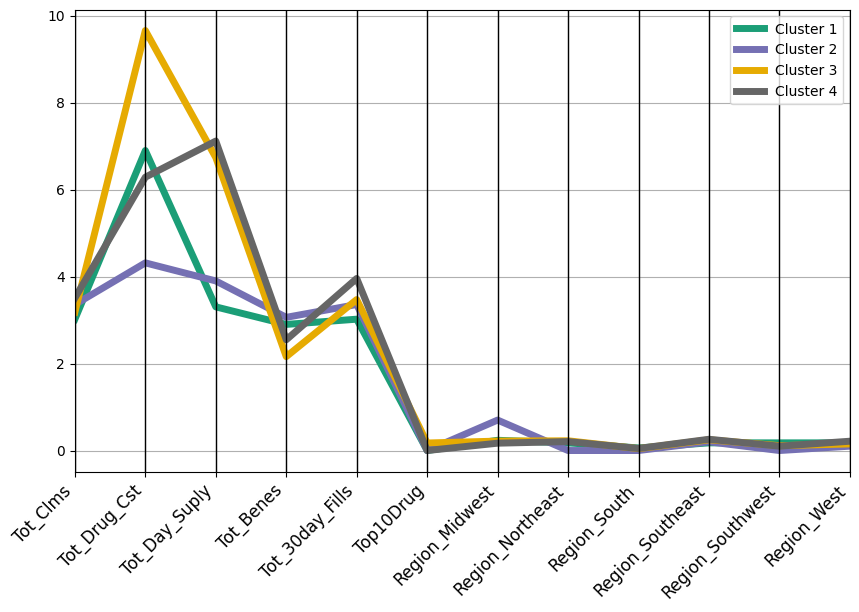

In [ ]:
# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(10, 6))
#plt.subplots_adjust(right=3)

ax = parallel_coordinates(clust_mean5, class_column='Cluster',
                          colormap='Dark2', linewidth=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Metrics

In [ ]:
cluster_model1_df['cluster'] = memb

#### Entropy calculation

In [ ]:
cluster_model1_df.reset_index(drop=False, inplace=True)
cluster_model1_df.columns

Index(['Gnrc_Name', 'Tot_Clms', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes',
       'Tot_30day_Fills', 'Top10Drug', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West',
       'cluster'],
      dtype='object')

In [ ]:
# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Transpose the DataFrame to have clusters and counts as columns and drugs as rows
cluster_counts_transposed = cluster_counts.T

# Group by 'cluster' and count the occurrences of each drug in each cluster
cluster_counts = cluster_model1_df.groupby('cluster')['Gnrc_Name'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 2.486328667787185
Cluster 2: 4.025132724542701
Cluster 3: 7.075649152091927
Cluster 4: 7.691470369703433


#### Entropy for geographic distribution

In [ ]:
# List of region columns
region_columns = ['Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_Southwest', 'Region_West']

# Initialize an empty DataFrame to store the counts
region_counts_df = pd.DataFrame()

# Iterate over each region column
for region in region_columns:
    # Filter the DataFrame where the region is True
    region_df = cluster_model1_df[cluster_model1_df[region]]
    # Group by 'cluster' and count the occurrences of the region where value is True for each cluster
    cluster_counts = region_df.groupby('cluster').size()
    # Append the counts to the region_counts_df DataFrame with the region name as the column name
    region_counts_df[region] = cluster_counts

# Calculate the total count of drugs in each cluster
total_drugs_in_cluster = region_counts_df.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = region_counts_df.div(total_drugs_in_cluster, axis=0)
#Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities * np.log2(cluster_probabilities)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=1)

# Print the entropy for each cluster
print("Entropy for each Region:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f" {cluster}: {entropy}")


Entropy for each Region:
 1: 2.428315515000687
 2: 2.427865721180668
 3: 1.3834390845887163
 4: 2.433206219346495


In [ ]:
df_impute['cluster_model5']=cluster_model1_df['cluster']

# Group by 'cluster' and count the occurrences of each disease in each cluster
cluster_counts = df_impute.groupby('cluster_model5')['disease'].value_counts().unstack(fill_value=0)

# Calculate the total count of drugs in each cluster
total_disease_in_cluster = cluster_counts.sum(axis=1)

# Calculate the probability of each drug in each cluster
cluster_probabilities = cluster_counts.div(total_drugs_in_cluster, axis=0)

# Transpose the DataFrame to have drugs as rows and clusters as columns
cluster_probabilities_transposed = cluster_probabilities.T

# Calculate the entropy for each cluster
cluster_entropies = -(cluster_probabilities_transposed * np.log2(cluster_probabilities_transposed)).fillna(0)

# Sum the entropies for each cluster
cluster_entropies_sum = cluster_entropies.sum(axis=0)

# Print the entropy for each cluster
print("Entropy for each cluster:")
for cluster, entropy in cluster_entropies_sum.items():
    print(f"Cluster {cluster}: {entropy}")

Entropy for each cluster:
Cluster 1: 2.0132790219068077
Cluster 2: 3.8883122251661932
Cluster 3: 5.787704617198266
Cluster 4: 6.150965554655233


### TECH

In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model5')['Gnrc_Name'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model5')['Gnrc_Name'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))


Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 7 unique drugs
diph,pertuss(acell),tet vac/pf, peg3350/sod sul/nacl/kcl/asb/c, peg3350/sod sulf,bicarb,cl/kcl, promethazine hcl, rivaroxaban, sodium chloride/nahco3/kcl/peg, varicella-zoster ge/as01b/pf
Cluster 2: 20 unique drugs
amoxicillin, azithromycin, celecoxib, ciprofloxacin hcl, clindamycin hcl, dexamethasone, diazepam, fluconazole, hydrocodone/acetaminophen, ibuprofen, levofloxacin, lorazepam, neomycin sulfate, oxycodone hcl, peg3350/sod sulf,bicarb,cl/kcl, prednisone, sodium chloride/nahco3/kcl/peg, sulfamethoxazole/trimethoprim, tramadol hcl, triazolam
Cluster 3: 310 unique drugs
abacavir/dolutegravir/lamivudi, abaloparatide, abatacept, abiraterone acetate, acalabrutinib, acetazolamide, acetylcysteine, acitretin, acyclovir, adalimumab, albuterol sulfate, alirocumab, amantadine hcl, apixaban, aripiprazole, aripiprazole lauroxil, asfotase alfa, atomoxetine hcl, azathioprine, azelastine/fluticasone, 

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:

Count: 0


In [ ]:
# Group by cluster and aggregate unique drug names
unique_drug_names_per_cluster = df_impute.groupby('cluster_model5')['disease'].unique()

# Count the number of unique drugs in each cluster
unique_drugs_per_cluster = df_impute.groupby('cluster_model5')['disease'].nunique()

# Print the number of unique drugs and the unique drug names for each cluster
print("Number of unique drugs in each cluster and sorted unique drug names:")
for cluster, drugs_in_cluster in unique_drug_names_per_cluster.items():
    num_unique_drugs = unique_drugs_per_cluster.loc[cluster]
    print(f"Cluster {cluster}: {num_unique_drugs} unique drugs")
    sorted_drugs = sorted(drugs_in_cluster)
    print(", ".join(sorted_drugs))

Number of unique drugs in each cluster and sorted unique drug names:
Cluster 1: 5 unique drugs
acute myeloid leukemia, alkylating agent cystitis, allergic reactions, atrial fibrillation, constipation
Cluster 2: 18 unique drugs
acne, actinomycosis, acute lymphocytic leukemia, alkylating agent cystitis, ankylosing spondylitis, anxiety, asthma, acute, back pain, bacterial skin infection, blastomycosis, chronic pain, constipation, insomnia, muscle pain, pain, seizures (convulsions), sinusitis, urinary tract infection
Cluster 3: 164 unique drugs
abnormal uterine bleeding, acetaminophen overdose, acne, actinomycosis, acute coronary syndrome, acute lymphoblastic leukemia, acute myeloid leukemia, adhd (attention deficit hyperactivity disorder), adjunct to antibiotic therapy, aggressive behavior, agitated state, agitation, aids/hiv, alcohol dependence, alkylating agent cystitis, allergic asthma, alzheimer's disease, amyloidosis, anal itching, anemia, anesthesia, anesthetic adjunct, angina, angi

In [ ]:
## Convert NumPy arrays to sets for each cluster's unique drug names
unique_drug_sets_per_cluster = unique_drug_names_per_cluster.apply(set)

# Find the drugs present in all clusters
drug_in_all_clusters = set.intersection(*unique_drug_sets_per_cluster)

# Count of drugs present in all clusters
count_drug_in_all_clusters = len(drug_in_all_clusters)

# Print the drugs present in all clusters and their count
print("Drugs present in all clusters:")
print(", ".join(sorted(drug_in_all_clusters)))
print(f"Count: {count_drug_in_all_clusters}")

Drugs present in all clusters:
alkylating agent cystitis, constipation
Count: 2


In [ ]:
# Calculate average drug cost for each cluster
average_drug_cost_per_cluster = df_impute.groupby('cluster_model5')['Tot_Drug_Cst'].mean()

# Calculate total drug cost for each cluster
total_drug_cost_per_cluster = df_impute.groupby('cluster_model5')['Tot_Drug_Cst'].sum()

# Print the results
print("Average Drug Cost for Each Cluster:")
print(average_drug_cost_per_cluster)

# Print the results
print("Total Drug Cost for Each Cluster:")
print(total_drug_cost_per_cluster)

Average Drug Cost for Each Cluster:
cluster_model5
1     1732.654
2      189.205
3    44958.106
4     2036.282
Name: Tot_Drug_Cst, dtype: float64
Total Drug Cost for Each Cluster:
cluster_model5
1    2.946e+04
2    7.757e+03
3    6.798e+07
4    1.707e+07
Name: Tot_Drug_Cst, dtype: float64


In [ ]:
# Calculate the number of data points in each cluster
data_points_per_cluster = df_impute.groupby('cluster_model5').size()
# Print the results
print("Number of data points in each cluster:")
print(data_points_per_cluster)

Number of data points in each cluster:
cluster_model5
1      17
2      41
3    1512
4    8384
dtype: int64


#Drug Disease Association

In [ ]:
# Read the CSV file into a DataFrame
drugdf1 = pd.read_csv("final 3.csv",index_col=None)
drugdf1 = drugdf1.drop_duplicates(subset=['disease', 'drug'])
drugdf1.head(1)


,Unnamed: 0,disease,drug
0,0,Alkylating Agent Cystitis,sodium bicarbonate


In [ ]:
# Read the CSV file into a DataFrame
drugdf2 = pd.read_csv("drugs.csv")
drugdf2 = drugdf2.drop_duplicates(subset=['drug_name', 'medical_condition'])
# Display the first few rows of the DataFrame to verify it was read correctly
print(drugdf2.head(1))

     drug_name medical_condition  \
0  doxycycline              Acne   

                       medical_condition_description activity rx_otc  ...  \
0  Acne Other names: Acne Vulgaris; Blackheads; B...      87%     Rx  ...   

  alcohol rating no_of_reviews                      medical_condition_url  \
0       X    6.8         760.0  https://www.drugs.com/condition/acne.html   

                                drug_link  
0  https://www.drugs.com/doxycycline.html  

[1 rows x 12 columns]


In [ ]:
drugdf2.rename(columns={'medical_condition': 'disease', 'drug_name': 'drug'}, inplace=True)

# Concatenate the two DataFrames
combined_df = pd.concat([drugdf1[['disease', 'drug']], drugdf2[['disease', 'drug']]])

# Convert values in 'disease' and 'drug' columns to lowercase
combined_df['disease'] = combined_df['disease'].str.lower()
combined_df['drug'] = combined_df['drug'].str.lower()

# Remove duplicates based on 'disease' and 'drug' columns
combined_df = combined_df.drop_duplicates(subset=['disease', 'drug'])
combined_df = combined_df.drop_duplicates(subset=['drug'])
combined_df = combined_df.reset_index(drop=True)

# Display the combined DataFrame
combined_df

,disease,drug
0,alkylating agent cystitis,sodium bicarbonate
1,alkylating agent cystitis,citric acid / sodium citrate
2,abdominal distension,bethanechol
3,abdominal distension,pamabrom
4,abdominal distension prior to abdominal x-ray,vasopressin
...,...,...
3961,weight loss,benzphetamine
3962,weight loss,fenfluramine
3963,weight loss,fendique er
3964,weight loss,imcivree


In [ ]:
from google.colab import files

combined_df.to_csv('drug_df.csv', index=False)
files.download('drug_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
combined_df[combined_df['drug'] == 'potassium chloride']

,disease,drug
1248,hypokalemia,potassium chloride


In [ ]:
# Convert 'Gnrc_Name' column in cluster_model1_df to lowercase
cluster_model1_df['Gnrc_Name'] = cluster_model1_df['Gnrc_Name'].str.lower()

In [ ]:
# Merge cluster_model1_df with combined_df on the 'Gnrc_Name' and 'drug' columns
merged_df = pd.merge(cluster_model1_df, combined_df, how='left', left_on='Gnrc_Name', right_on='drug')

# Drop the 'drug' column from merged_df
merged_df.drop(columns=['drug'], inplace=True)

# Display the merged DataFrame
print(merged_df)

                   Gnrc_Name  Tot_Clms  Tot_Drug_Cst  Tot_Day_Suply  \
0         potassium chloride     4.700         8.969          8.695   
1                fluconazole     2.708         4.112          3.296   
2                  acyclovir     4.043         7.444          7.916   
3     fluticasone/vilanterol     3.091         9.112          6.538   
4          enalapril maleate     2.639         5.682          6.538   
...                      ...       ...           ...            ...   
9995              lisinopril     4.190         5.729          8.164   
9996                apixaban     5.529        12.009          9.151   
9997              famotidine     3.497         5.891          7.089   
9998     haloperidol lactate     2.639         6.222          5.176   
9999           nebivolol hcl     3.638         9.524          7.867   

      Tot_Benes  ...  Region_Southwest  Region_West  cluster  \
0         3.497  ...             False        False        4   
1         1.946  ..

In [ ]:
import re

# Step 1: Match with the full name
merged_df = pd.merge(cluster_model1_df, combined_df, how='left', left_on='Gnrc_Name', right_on='drug')

# Drop the 'drug' column from merged_df
merged_df.drop(columns=['drug'], inplace=True)

# Step 2: Check the 'disease' field which is null
null_disease_records = merged_df[merged_df['disease'].isnull()]

# Step 3: For the records which have null in the 'disease' field, try to match the first word of 'Gnrc_Name' with 'drug' in combined_df
for index, row in null_disease_records.iterrows():
    first_words = re.split(r'\s|/', row['Gnrc_Name'].lower())
    for first_word in first_words:
        matching_drug = combined_df[combined_df['drug'].str.startswith(first_word)]
        if not matching_drug.empty:
            # Update 'disease' field in merged_df with the corresponding value from matching_drug
            merged_df.at[index, 'disease'] = matching_drug.iloc[0]['disease']
            break  # Exit the loop once a matching drug is found

# Display the merged DataFrame
print(merged_df)



NameError: name 'pd' is not defined

In [ ]:
filtered_df = merged_df[merged_df['disease'].isnull()]
filtered_df

,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Tot_30day_Fills,Top10Drug,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_Southwest,Region_West,cluster,Gnrc_First_Word,disease


In [ ]:
merged_df['disease'].nunique()

167

In [ ]:
from google.colab import files

merged_df.to_csv('drug_disease.csv', index=False)
files.download('drug_disease.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>